# Probability theory
*This notebook illustrates methods to implement tasks using the probability theory*
***
Alessandro Tufano 2020

### Import Packages

In [1]:
import numpy as np
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

### Generate random data

Text(0.5, 1.0, 'Empirical Gaussian Observations')

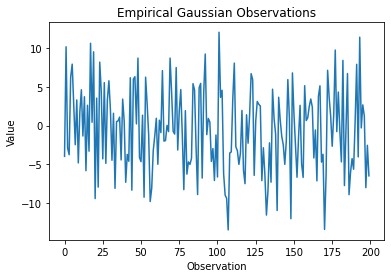

In [4]:
#Generation of random data normally distributed
data = np.random.normal(0,5, size=200)
plt.plot(data)
plt.xlabel("Observation")
plt.ylabel("Value")
plt.title("Empirical Gaussian Observations")

Text(0.5, 1.0, 'Cumulative Distribution Function - empirical data')

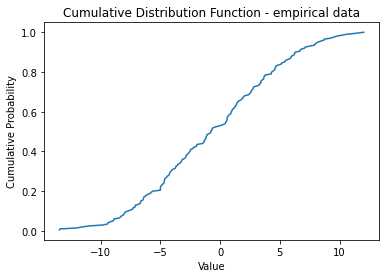

In [7]:
#Definition of the empirical CDF
ecdf = ECDF(data)
plt.plot(ecdf.x, ecdf.y)
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function - empirical data")

### Fit empirical data to normal distribution

In [16]:
#data fitting to a normal distribution
mu, std = norm.fit(data)
print(f"Best fit with a normal distribution having mu={np.round(mu,2)}, sigma={np.round(std,2)} ")



Best fit with a normal distribution having mu=-0.62, sigma=5.39 


Text(0.5, 1.0, 'Gaussian Fit PDF: mu = -0.62,  std = 5.39')

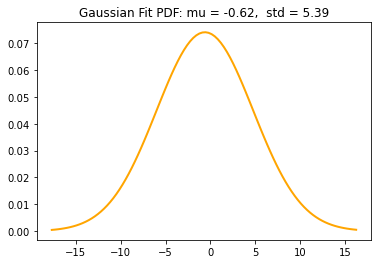

In [17]:
# Plot the best-fit PDF.
xmin, xmax = axs[1,0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'orange', linewidth=2)
plt.title("Gaussian Fit PDF: mu = %.2f,  std = %.2f" % (mu, std))

Text(0.5, 1.0, 'Gaussian Fit CDF: mu = -0.62,  std = 5.39')

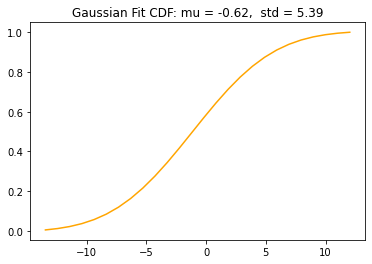

In [18]:
# Plot the best-fit CDF

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * std)) *
     np.exp(-0.5 * (1 / std * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

plt.plot(bins, y, 'orange', linewidth=1.5,)
plt.title("Gaussian Fit CDF: mu = %.2f,  std = %.2f" % (mu, std))

### Plot the result

Text(0.5, 1.0, 'Gaussian Fit CDF: mu = -0.62,  std = 5.39')

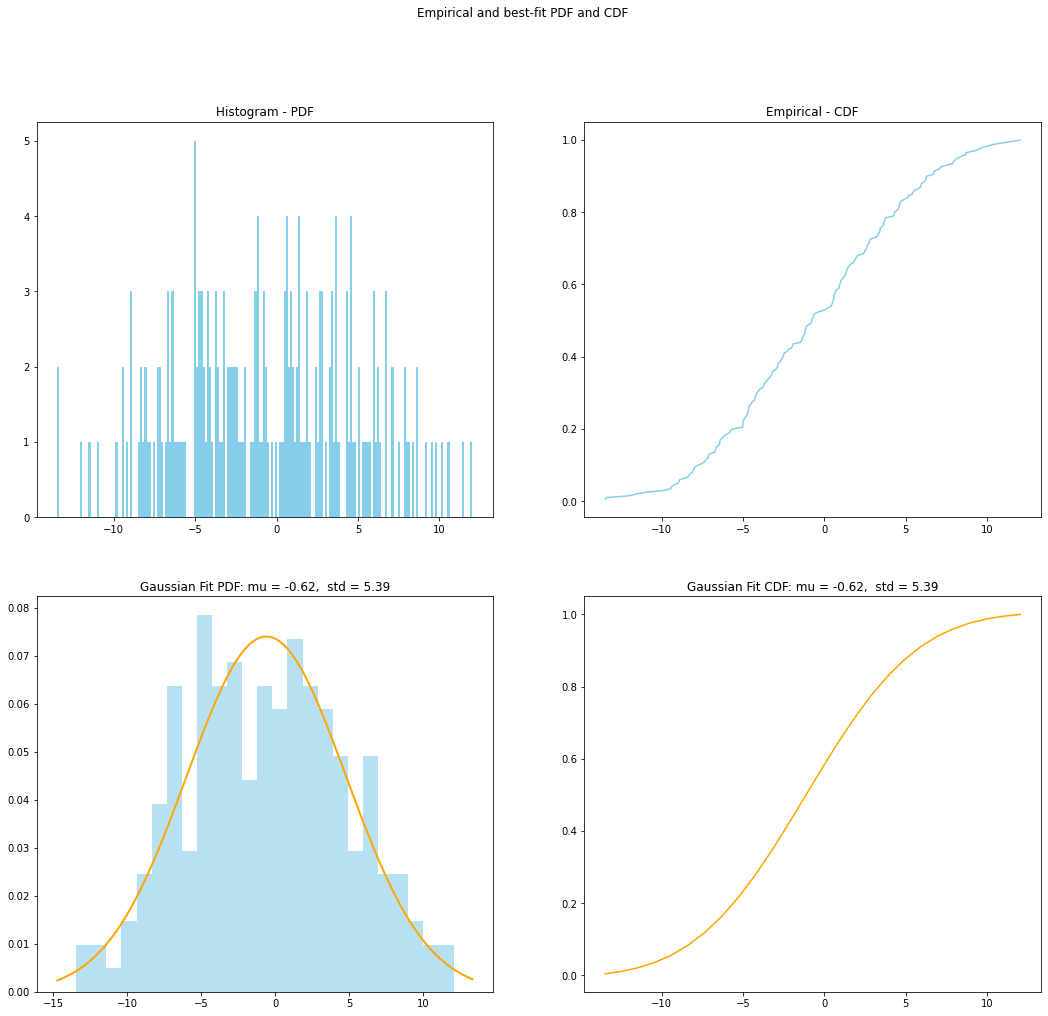

In [23]:
#Plot all together for comparison
fig, axs = plt.subplots(2, 2)
plt.rcParams['figure.figsize'] = [25, 25] #[width height] #set figure size
fig.suptitle('Empirical and best-fit PDF and CDF')

#plot empirical

axs[0,0].hist(data, color='skyblue', bins=len(data))
axs[0,0].set_title('Histogram - PDF')
axs[0,1].plot(ecdf.x,ecdf.y, color='skyblue')
axs[0,1].set_title('Empirical - CDF')

#plot fitted

# Plot the histogram
n, bins, patches =axs[1,0].hist(data, bins=25, density=True, alpha=0.6, color='skyblue')
# Plot the PDF.
xmin, xmax = axs[1,0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[1,0].plot(x, p, 'orange', linewidth=2)
title = "Gaussian Fit PDF: mu = %.2f,  std = %.2f" % (mu, std)
axs[1,0].set_title(title)


# plot the CDF
# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * std)) *
     np.exp(-0.5 * (1 / std * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

axs[1,1].plot(bins, y, 'orange', linewidth=1.5,)
title = "Gaussian Fit CDF: mu = %.2f,  std = %.2f" % (mu, std)
axs[1,1].set_title(title)